# **TASK 1**

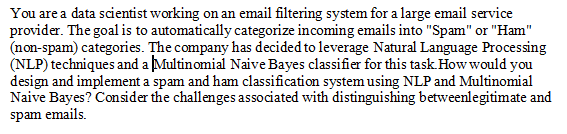

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv("spam_ham.csv")
df

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0
...,...,...
5791,From ilug-admin@linux.ie Mon Jul 22 18:12:45 2...,0
5792,From fork-admin@xent.com Mon Oct 7 20:37:02 20...,0
5793,Received: from hq.pro-ns.net (localhost [127.0...,1
5794,From razor-users-admin@lists.sourceforge.net T...,0


In [ ]:
df['target'].value_counts()

,count
target,
0,3900
1,1896


In [ ]:
df.dtypes

,0
text,object
target,int64


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df['text'],df['target'],test_size=0.3,random_state=42,stratify=df['target'])

##USING NLP AND MULTINOMIAL NB

In [ ]:
vect = TfidfVectorizer(stop_words='english',max_features=5000,ngram_range=(1, 2))

In [ ]:
xtrain_tfidf = vect.fit_transform(xtrain)
xtest_tfidf = vect.transform(xtest)

In [ ]:
nb = MultinomialNB()
nb.fit(xtrain_tfidf, ytrain)

MultinomialNB()

In [ ]:
ypred = nb.predict(xtest_tfidf)
accu = accuracy_score(ytest, ypred)
print("MODEL ACCURACY:", accu)

MODEL ACCURACY: 0.9700977573317999


In [ ]:
print("CLASSIFICATION REPORT:")
print(classification_report(ytest, ypred, target_names=["Ham", "Spam"]))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         Ham       0.96      0.99      0.98      1170
        Spam       0.98      0.92      0.95       569

    accuracy                           0.97      1739
   macro avg       0.97      0.96      0.97      1739
weighted avg       0.97      0.97      0.97      1739



In [ ]:
print("CONFUSION MATRIX:")
print(confusion_matrix(ytest, ypred))

CONFUSION MATRIX:
[[1162    8]
 [  44  525]]


##**CHALLENGES:**


1. **Imbalanced dataset**: Ensure spam and ham classes are balanced during training.
2. **False positives**: Legitimate emails misclassified as spam can frustrate users.
3. **Dynamic nature of spam**: Spam evolves, so regular retraining is crucial.
4. **Text preprocessing**: Handling noisy data, including typos and obfuscation by spammers.


# **TASK 2**

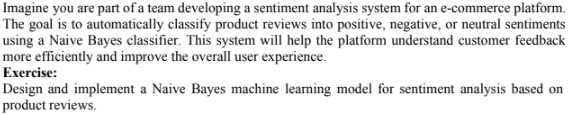

In [ ]:
sd = pd.read_csv("sentiment_dataset.csv")

sd

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
# text to lowercase and remove special characters
sd['review'] = sd['review'].str.lower()
sd['review'] = sd['review'].str.replace(r'[^\w\s]', '', regex=True)


In [ ]:
x = sd['review']
y = sd['sentiment']
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state=42)

##Vectorization

In [ ]:
vect = TfidfVectorizer(stop_words='english', max_features=5000)
xtrain_vect = vect.fit_transform(xtrain)
xtest_vect = vect.transform(xtest)

##Naive Bayes classifier

In [ ]:
nb = MultinomialNB()
nb.fit(xtrain_vect, ytrain)

y_pred = nb.predict(xtest_vect)

In [ ]:
print("ACCURACY:", accuracy_score(ytest, y_pred))
print("\nCLASSIFICATION REPORT:\n", classification_report(ytest, y_pred))

ACCURACY: 0.8518

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
review2 = [
    "This movie was very boring. I didnot enjoy it at all.",
    "I loved the plot of the movie especially the actor. Highly recommended watch.",
    "An absolute masterpiece! The storyline is compelling and the visuals are breathtaking.",
    "Disappointing! The trailer was misleading, and the film failed to deliver. "]

test_vect = vect.transform(review2)
pred = nb.predict(test_vect)

print("PREDICTION FOR TESTING REVIEWS:")
for review, sentiment in zip(review2, pred):
    print(f"Review: {review} Predicted Sentiment: {sentiment} \n")

PREDICTION FOR TESTING REVIEWS:
Review: This movie was very boring. I didnot enjoy it at all. Predicted Sentiment: negative 

Review: I loved the plot of the movie especially the actor. Highly recommended watch. Predicted Sentiment: positive 

Review: An absolute masterpiece! The storyline is compelling and the visuals are breathtaking. Predicted Sentiment: positive 

Review: Disappointing! The trailer was misleading, and the film failed to deliver.  Predicted Sentiment: negative 

